# Overview of available variables and analysis results

Data analysis is supposed to be done in script `EVAL_SCRIPT.py` which can be found in the parent directory. This script is supposed to create output files and plots that may be used here to summarise the results.

In [1]:
import os
import pyaerocom as pya
pya.change_verbosity('critical')

import EVAL_POST as helpers
import EVAL_SCRIPT as analysis

IMPORT_MODEL_DATA = 1

2018-08-31 16:11:03,820:INFO:
Reading aliases ini file: /home/jonasg/github/pyaerocom/pyaerocom/data/aliases.ini
2018-08-31 16:11:04,664:WARNING:
geopy library is not available. Aeolus data read not enabled


Check for updates in file containing models.

In [2]:
model_info_file = '/lustre/storeA/project/aerocom/aerocom-users-database/AEROCOM-PHASE-III/reference-list'

if os.path.exists(model_info_file):
    with open(model_info_file) as f:
        for line in f:
            if line.strip():
                print(line)

1 NorESM: AlfKirkevag MetNo

  CAM6-Oslo_NF2kNucl_7jun2018AK

attention

is on /lustre/storeA/project/aerocom/aerocom2/NorESM_SVN_TEST

2 OsloCTM3 : Gunnar Myhre - Marianne Lund CICERO

OsloCTM2_INSITU  (includes extinction and absorption coefficients)

is probably outdated...

3 TM5-AP3: Twan van Noye KNMI

TM5_AP3-CTRL2016

and

TM5_AP3-INSITU (daily files are missing, but Jan should produce them)



### Define models, obsnetworks, years, and variables

In [3]:
YEARS = analysis.YEARS

# List of models considered
MODEL_LIST = analysis.MODEL_LIST
print('List of models:\n{}'.format(MODEL_LIST))

# List of gridded OBS networks
GRIDDED_OBS = analysis.GRIDDED_OBS
print('\nList of gridded obs networks:\n{}'.format(pya.utils.dict_to_str(GRIDDED_OBS)))

# List of ungridded obsnetworks considered (so far)
UNGRIDDED_OBS = analysis.UNGRIDDED_OBS
print('\nList of ungridded obs networks:\n{}'.format(pya.utils.dict_to_str(UNGRIDDED_OBS)))

# Get unique variables
VARS = analysis.VARS
print('\nList of variables (unique):\n{}'.format(VARS))

List of models:
['ECMWF_CAMS_REAN', 'CAM6-Oslo_NF2kNucl_7jun2018AK', 'OsloCTM2_INSITU', 'TM5_AP3-CTRL2016', 'TM5_AP3-INSITU']

List of gridded obs networks:

   MODIS6.terra (list, 1 items)
   ['od550aer']

   MODIS6.aqua (list, 1 items)
   ['od550aer']


List of ungridded obs networks:

   AeronetSunV2Lev2.daily (list, 2 items)
   ['od550aer'
    'ang4487aer']

   AeronetSunV3Lev2.daily (list, 2 items)
   ['od550aer'
    'ang4487aer']

   AeronetSDAV2Lev2.daily (list, 2 items)
   ['od550lt1aer'
    'od550gt1aer']

   AeronetSDAV3Lev2.daily (list, 2 items)
   ['od550lt1aer'
    'od550gt1aer']

   AeronetInvV2Lev2.daily: abs550aer
   AeronetInvV3Lev2.daily: abs550aer
   EBASMC (list, 2 items)
   ['scatc550aer'
    'absc550aer']


List of variables (unique):
['od550aer', 'ang4487aer', 'od550lt1aer', 'od550gt1aer', 'abs550aer', 'scatc550aer', 'absc550aer']


### Import model results

In [4]:
if IMPORT_MODEL_DATA:
    read_models = pya.io.ReadGriddedMulti(MODEL_LIST)
    read_models.read_individual_years(VARS, YEARS)

Print overview of what is in the models

In [5]:
if IMPORT_MODEL_DATA:
    print(read_models)


Pyaerocom ReadGriddedMulti
--------------------------
Model IDs: ['ECMWF_CAMS_REAN', 'CAM6-Oslo_NF2kNucl_7jun2018AK', 'OsloCTM2_INSITU', 'TM5_AP3-CTRL2016', 'TM5_AP3-INSITU']

Loaded data:

Pyaerocom ReadGridded
---------------------
Model ID: ECMWF_CAMS_REAN
Data directory: /lustre/storeA/project/aerocom/aerocom-users-database/ECMWF/ECMWF_CAMS_REAN/renamed
Available variables: ['ang4487aer', 'od440aer', 'od550aer', 'od550bc', 'od550dust', 'od550oa', 'od550so4', 'od550ss', 'od865aer']
Available years: [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 9999]
Available time resolutions ['daily', 'monthly']

Loaded GriddedData objects (individual years):

Pyaerocom GriddedData
---------------------
Variable: ang4487aer
Temporal resolution: daily
Start / Stop: 2008-01-01T00:00:00.000000 - 2008-12-31T00:00:00.000000

Pyaerocom GriddedData
---------------------
Variable: ang4487aer
Temporal resolution: daily
Start / Stop: 2010-01-01T00:00:00.000000 - 2010-1

## Results

This section contains results from the analysis that can be performed using the script ``EVAL_SCRIPT.py``. The following lines read all result CSV files that are stored in the result folder, imports them and extracts **Bias (nmb), RMS and Pearson R coefficient)** as one multiindex dataframe.

In [6]:
results = helpers.load_result_files()

In [7]:
results = helpers.calc_stats(results)
results[0]

{'var_name': 'ang4487aer',
 'ts_type': 'yearly',
 'filter_name': 'WORLD-noMOUNTAINS',
 'start': Timestamp('2008-12-31 00:00:00'),
 'stop': Timestamp('2008-12-31 00:00:00'),
 'data_source_idx': ['AeronetSunV2Lev2.daily', 'ECMWF_CAMS_REAN'],
 'model_id': 'ECMWF_CAMS_REAN',
 'obs_id': 'AeronetSunV2Lev2.daily',
 'year': 2008,
 'data':           ref      data
 0    1.298339  1.153985
 1    0.465052  0.842888
 2    0.283219  0.206532
 3    1.286741  1.318888
 4    0.622921  0.642736
 5    1.104600  0.848695
 6    1.258080  1.392968
 7    1.110568  1.060606
 8    0.900251  1.273923
 9    1.099245  1.061381
 10   1.335421  1.134596
 11   1.546164  1.204878
 12   1.427620  1.417684
 13   0.899692  1.206104
 14   1.552806  1.288323
 15   0.344046  0.382083
 16   1.294374  1.207886
 17   0.824664  1.260712
 18   1.423986  1.296077
 19   1.062867  1.089402
 20   1.458178  1.251660
 21   1.498378  1.392968
 22   1.135401  0.537023
 23   0.918637  0.857467
 24   1.021018  1.289685
 25   1.619099  1.

In [9]:
table = helpers.to_multiindex_dataframe(results)
table.sort_index(inplace=True)
table

Bias  \
Model            Year Freq   Variable    Obs                                  
ECMWF_CAMS_REAN  2008 yearly ang4487aer  AeronetSunV2Lev2.daily   -0.107033   
                                         AeronetSunV3Lev2.daily   37.725739   
                             od550aer    AeronetSunV2Lev2.daily    4.298660   
                                         AeronetSunV3Lev2.daily    1.024228   
                                         MODIS6.aqua             -15.573912   
                                         MODIS6.terra            -23.244062   
                 2010 yearly ang4487aer  AeronetSunV2Lev2.daily    0.362782   
                                         AeronetSunV3Lev2.daily   13.650564   
                             od550aer    AeronetSunV2Lev2.daily   -1.153837   
                                         AeronetSunV3Lev2.daily   -1.742670   
                                         MODIS6.aqua             -13.001064   
                                         MODIS6.terra            -20.935294   
OsloCTM2_INSITU  2008 yearly od550aer    AeronetSunV2Lev2.daily  -52.669437   
                                         AeronetSunV3Lev2.daily  -56.811668   
                                         MODIS6.aqua             -66.011154   
                                         MODIS6.terra            -68.980735   
TM5_AP3-CTRL2016 2008 yearly abs550aer   AeronetInvV2Lev2.daily  -60.529264   
                                         AeronetInvV3Lev2.daily  -50.757801   
                             od550aer    AeronetSunV2Lev2.daily   -6.230790   
                                         AeronetSunV3Lev2.daily  -16.804808   
                                         MODIS6.aqua             -26.311017   
                                         MODIS6.terra            -32.787338   
                             od550lt1aer AeronetSDAV2Lev2.daily -100.000000   
                                         AeronetSDAV3Lev2.daily -100.000000   
                 2010 yearly abs550aer   AeronetInvV2Lev2.daily  -61.961365   
                                         AeronetInvV3Lev2.daily  -53.541291   
                             od550aer    AeronetSunV2Lev2.daily  -10.965085   
                                         AeronetSunV3Lev2.daily  -13.312556   
                                         MODIS6.aqua             -25.067594   
                                         MODIS6.terra            -31.898424   
                             od550lt1aer AeronetSDAV2Lev2.daily -100.000000   
                                         AeronetSDAV3Lev2.daily -100.000000   
TM5_AP3-INSITU   2010 yearly abs550aer   AeronetInvV2Lev2.daily  -64.121632   
                                         AeronetInvV3Lev2.daily  -56.573553   
                             od550aer    AeronetSunV2Lev2.daily  -14.190586   
                                         AeronetSunV3Lev2.daily  -16.534736   
                                         MODIS6.aqua             -29.736394   
                                         MODIS6.terra            -36.144311   
                             od550lt1aer AeronetSDAV2Lev2.daily   -8.731847   
                                         AeronetSDAV3Lev2.daily  -12.210068   

                                                                      RMS  \
Model            Year Freq   Variable    Obs                                
ECMWF_CAMS_REAN  2008 yearly ang4487aer  AeronetSunV2Lev2.daily  0.229991   
                                         AeronetSunV3Lev2.daily  2.623501   
                             od550aer    AeronetSunV2Lev2.daily  0.076006   
                                         AeronetSunV3Lev2.daily  0.111177   
                                         MODIS6.aqua             0.121085   
                                         MODIS6.terra            0.110039   
                 2010 yearly ang4487aer  AeronetSunV2Lev2.daily  0.230148   
                                         AeronetSunV3Lev2.d

In [15]:
bias = table['Bias'].unstack(['Model', 'Year', 'Freq'])
from IPython.display import display, Math

Model                              ECMWF_CAMS_REAN            OsloCTM2_INSITU  \
Year                                          2008       2010            2008   
Freq                                        yearly     yearly          yearly   
Variable    Obs                                                                 
abs550aer   AeronetInvV2Lev2.daily             NaN        NaN             NaN   
            AeronetInvV3Lev2.daily             NaN        NaN             NaN   
ang4487aer  AeronetSunV2Lev2.daily       -0.107033   0.362782             NaN   
            AeronetSunV3Lev2.daily       37.725739  13.650564             NaN   
od550aer    AeronetSunV2Lev2.daily        4.298660  -1.153837      -52.669437   
            AeronetSunV3Lev2.daily        1.024228  -1.742670      -56.811668   
            MODIS6.aqua                 -15.573912 -13.001064      -66.011154   
            MODIS6.terra                -23.244062 -20.935294      -68.980735   
od550lt1aer AeronetSDAV2Lev2.daily             NaN        NaN             NaN   
            AeronetSDAV3Lev2.daily             NaN        NaN             NaN   

Model                              TM5_AP3-CTRL2016             TM5_AP3-INSITU  
Year                                           2008        2010           2010  
Freq                                         yearly      yearly         yearly  
Variable    Obs                                                                 
abs550aer   AeronetInvV2Lev2.daily       -60.529264  -61.961365     -64.121632  
            AeronetInvV3Lev2.daily       -50.757801  -53.541291     -56.573553  
ang4487aer  AeronetSunV2Lev2.daily              NaN         NaN            NaN  
            AeronetSunV3Lev2.daily              NaN         NaN            NaN  
od550aer    AeronetSunV2Lev2.daily        -6.230790  -10.965085     -14.190586  
            AeronetSunV3Lev2.daily       -16.804808  -13.312556     -16.534736  
            MODIS6.aqua                  -26.311017  -25.067594     -29.736394  
            MODIS6.terra                 -32.787338  -31.898424     -36.144311  
od550lt1aer AeronetSDAV2Lev2.daily      -100.000000 -100.000000      -8.731847  
            AeronetSDAV3Lev2.daily      -100.000000 -100.000000     -12.210068

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

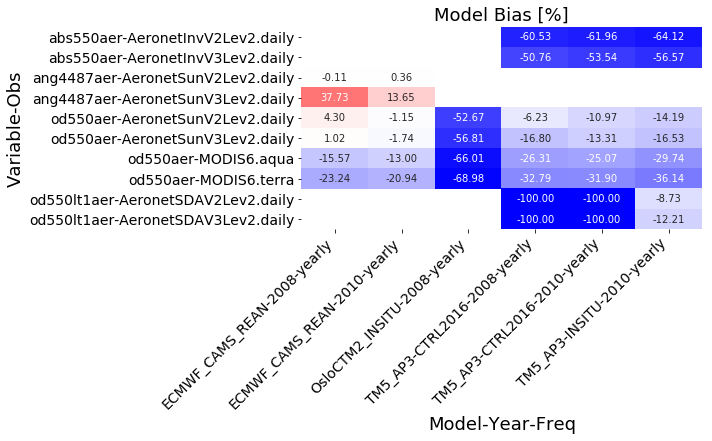

In [11]:
ax = pya.plot.heatmaps.df_to_heatmap(bias, 
                                     color_rowwise=False,
                                     figsize=(10, 6))
ax.set_title('Model Bias [%]')
display(Math(r'BIAS [\%] = 100 \cdot \frac{\sum_{i=1}^{N}M_i-O_i}{\sum_{i=1}^{N}O_i}'))
display(Math(r'N\,\hat{=}\,Number\,of\,observations'))
display(Math(r'M\,\hat{=}\,Model\,values'))
display(Math(r'O\,\hat{=}\,Observation\,values'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

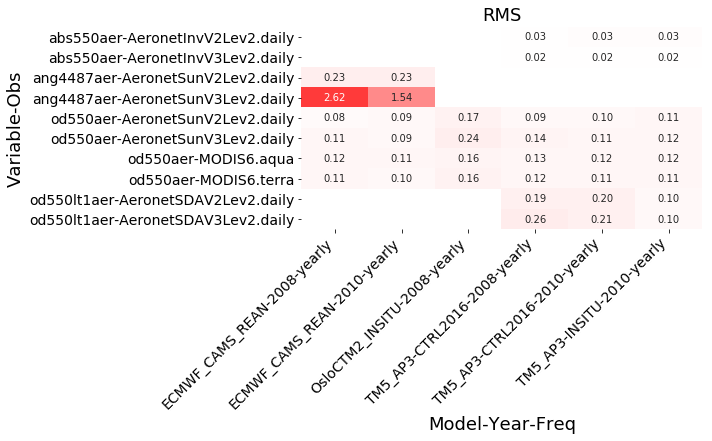

In [12]:
rms = table['RMS'].unstack(['Model', 'Year', 'Freq'])
ax = pya.plot.heatmaps.df_to_heatmap(rms, color_rowwise=False,
                                     figsize=(10, 6))
ax.set_title('RMS')
display(Math(r'RMS = \sqrt{\frac{1}{N}\,\sum_{i=1}^{N}(M-O)_i^2}'))
display(Math(r'N\,\hat{=}\,Number\,of\,observations'))
display(Math(r'M\,\hat{=}\,Model\,values'))
display(Math(r'O\,\hat{=}\,Observation\,values'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

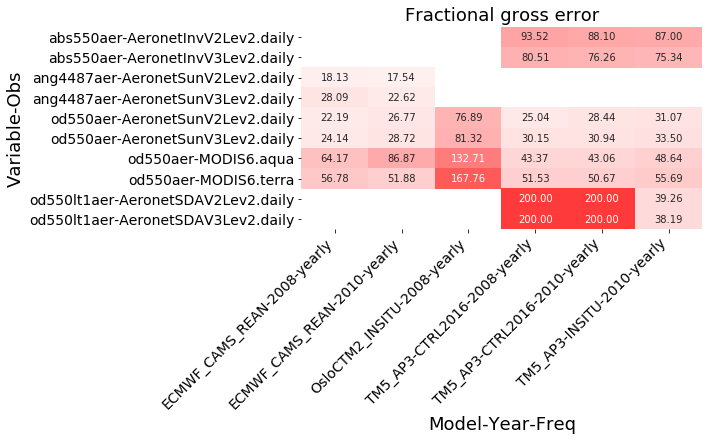

In [13]:
fge = table['FGE'].unstack(['Model', 'Year', 'Freq'])

ax = pya.plot.heatmaps.df_to_heatmap(fge, color_rowwise=False,
                                     center=1, figsize=(10, 6))
ax.set_title('Fractional gross error')
display(Math(r'FGE\,[\%] = \frac{2}{N}\sum_{i=1}^{N}\left|\frac{M_i-O_i}{M_i+O_i}\right|'))
display(Math(r'N\,\hat{=}\,Number\,of\,observations'))
display(Math(r'M\,\hat{=}\,Model\,values'))
display(Math(r'O\,\hat{=}\,Observation\,values'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

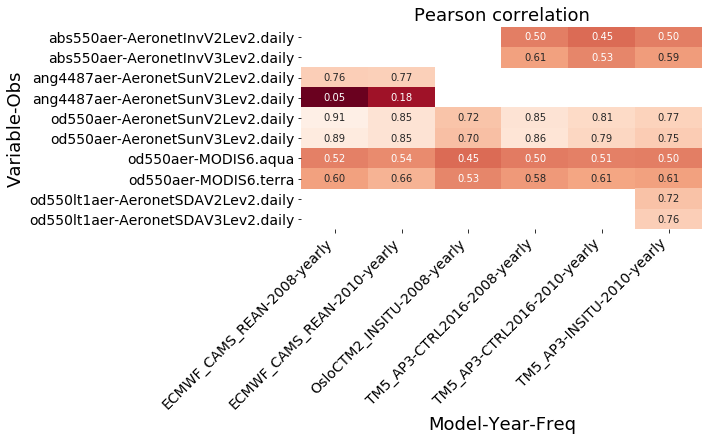

In [14]:
corr = table['R'].unstack(['Model', 'Year', 'Freq'])

ax = pya.plot.heatmaps.df_to_heatmap(corr, cmap='RdGy', color_rowwise=False,
                                     center=1, figsize=(10, 6))
ax.set_title('Pearson correlation')

display(Math(r'R = \frac{\sum_{i=1}^{N}(M_i-\bar{M})(O_i-\bar{O})}'
                         '{\sqrt{\sum_{i=1}^{N}(M_i-\\bar{M})^2}\sqrt{\sum_{i=1}^{N}(O_i-\\bar{O})^2}}'))
display(Math(r'N\,\hat{=}\,Number\,of\,observations'))
display(Math(r'M\,\hat{=}\,Model\,values'))
display(Math(r'O\,\hat{=}\,Observation\,values'))

## Retrieval of statistical parameters from collocated data (testing)

Currently, the statistical parameters like RMS are computed from the difference vector of the model values and the corresponding observations. This method does not take into account situations where the slope of the distribution in the scatter plot deviates from 1, i.e. where the performance of the model as a function of the retrieved parameter is dependent on the magnitude of the parameter. 

This section aims to illustrate this issue and suggests to use a linear fit (in loglog space) to consider both slope and offset (bias) of the model values relative to the observations.

### 2 examples

In [ ]:
import matplotlib.pyplot as plt
def plot_scatter(res, ax):
    data=res['data']
    

    x,y = data['ref'], data['data']
    ax.loglog(x, y, ' +b', label='data')
    ax.set_xlim([.01, 10])
    ax.set_ylim([.01, 10])
    ax.plot([.01, 10], [.01, 10])

    ax.set_xlabel(res['obs_id'])
    ax.set_ylabel(res['model_id'])
    ax.set_title('{} ({})'.format(res['var_name'], res['year']))
    m, c  = np.polyfit(np.log(x), np.log(y), 1)
    xvals= np.linspace(.01, 10, 100)
    y_fit = np.exp(m*np.log(xvals) + c)
    ax.plot(xvals, y_fit, '--r', label='Fit')
    ax.text(0.012, 2.2, 'RMS: {:.2f}'.format(res['rms']), color='r', fontsize=12)
    ax.text(0.012, 1.6, 'Bias: {:.2f} %'.format(res['nmb']), color='r', fontsize=12)
    ax.text(0.012, 1.1, 'FGE: {:.2f} %'.format(res['fge']), color='r', fontsize=12)
    
    ax.legend()
    
    return ax

ex1 = results[2]
ex2 = results[6]
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 6))
plot_scatter(ex1, ax1)
plot_scatter(ex2, ax2)

Assuming that the observations are true, in the ideal case, the results should scatter around the one-one line in the plot, but clearly, the fitted result shows, that the distribution is slanted with respect to the one-one line. **This is not represented in the statistical parameters that are caclulated based on the difference signal**.

Let's look at the difference signal of both examples as a function of the AOD:

In [ ]:
# cpmpute difference vectors for both example datasets
diff1 = ex1['data']['data'] - ex1['data']['ref']
diff2 = ex2['data']['data'] - ex2['data']['ref']

# plot differences against corresponding values (using obs values)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 6))

ax1.plot(ex1['data']['ref'], diff1, ' +b', label='Difference (example 1)')
ax1.set_title('{} ({}, {})'.format(ex1['model_id'], ex1['var_name'], ex1['year']))
ax1.set_xlabel('od550aer (obs)')
ax1.set_ylabel('od550aer (model - obs)')
ax2.plot(ex2['data']['ref'], diff2, ' +b', label='Difference (example 2)')
ax2.set_title('{} ({}, {})'.format(ex2['model_id'], ex2['var_name'], ex2['year']))
ax2.set_xlabel('od550aer (obs)')
ax2.set_ylabel('od550aer (model - obs)')

From the difference signals it becomes even more obvious that the ***performance*** of the models (i.e. their capability to *reproduce* the observations) is clearly dependent on the value of the AOD. E.g. model *OsloCTM2_INSITU 2008* shows linearly increasing deviations to the observations with increasing AOD. At low AODs, however, it matches considerably well.

**This is useful information and currently not represented by the statistical parameters that disregard the fact that the performance may be dependent on the values of the variable itself**

# Experimental area

In [ ]:
data = results[1]['data']

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 6))

x,y = data['obs'], data['model']
ax1.loglog(x, y, ' +b', label='data')

m, c  = np.polyfit(np.log(x), np.log(y), 1)
xvals= np.linspace(.01, 10, 100)
y_fit = np.exp(m*np.log(xvals) + c)
ax1.plot(xvals, y_fit, '--r', label='Fit: {:.2f}x + {:.2f}'.format(m, c))
ax1.set_xlim([.01, 10])
ax1.set_ylim([.01, 10])
ax1.plot([.01, 10], [.01, 10])
ax1.legend()
ax1.set_xlabel('Aeronet Sun V2 L2')
ax1.set_ylabel('TM5_AP3_CTRL2016')
ax1.set_title('od550aer (2010)')

difference = y-x
ax2.plot(x, difference, ' +b', label="Model - Obs")
ax2.set_xlabel('Aeronet Sun V2 L2')
ax2.set_ylabel('Difference (model - obs)')


diff_fit = np.polyfit(x, difference, 1)
ax2.plot(xvals, np.poly1d(diff_fit)(xvals), '--r', label='Fit: {:.2f}x + {:.2f}'.format(diff_fit[0], diff_fit[1]))
ax2.legend()
ax2.set_xlim([0, 10])

In [ ]:
import seaborn as sns
#mybins=np.logspace(0,np.log(10),100)
g = sns.JointGrid('obs', 'model', data, xlim=[0.01,10],ylim=[0.01,10])
g = g.plot(sns.regplot, sns.distplot)
ax = g.ax_joint
ax.set_xscale('log')
ax.set_yscale('log')
g.ax_marg_x.set_xscale('log')
g.ax_marg_y.set_yscale('log')